In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'titanic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3136%2F26502%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240704%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240704T115347Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D85419ad517e8c7614245a23e8e5947026f0cc9cb8015ba94c90855b6ec220d0f9317e61e426cfda82f3037b94bff291c0dcdf57741fbc6684e3902af34dd8eee92ef9837363d9975d33100d03a9db42c84f6abdbc91814866699dbabd4cdcbe29d7069394935e71ccde169b4d8d78907eb60fa016e0c905e395aea44da47750208bd77dcf8308a1f5e92a8f797fce1d0f96af755bb9e8ab8c2b480368a0e2292a0b1d1c7c6c3400aec933bfb9351e194219aa7f795083ef7f29e86cbea84c00b9688d0f682edcc3114f80ae4219b029410716742b30463715d932f5462b5ec3756c627dce457a63481843c55ade8d488ac01fd86d7b3ff213b21d1e9cf7088f7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 34877 bytes downloaded
Downloaded and uncompressed: titanic
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [3]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
full = pd.concat([train, test])

In [5]:
full.Parch.value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

In [6]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

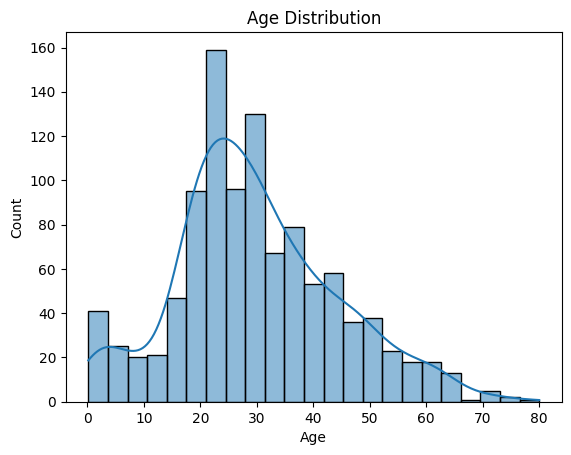

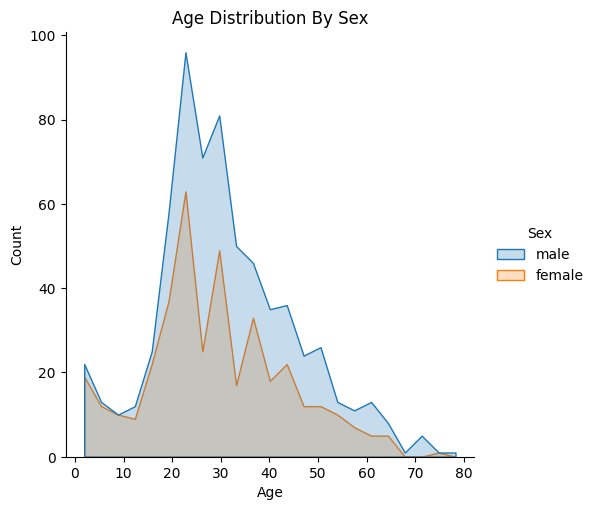

In [8]:
sns.histplot(full.Age, kde=True).set(title='Age Distribution')
sns.displot(data=full.dropna(subset=['Age']), x = 'Age', element="poly", hue = 'Sex')\
.set(title='Age Distribution By Sex')

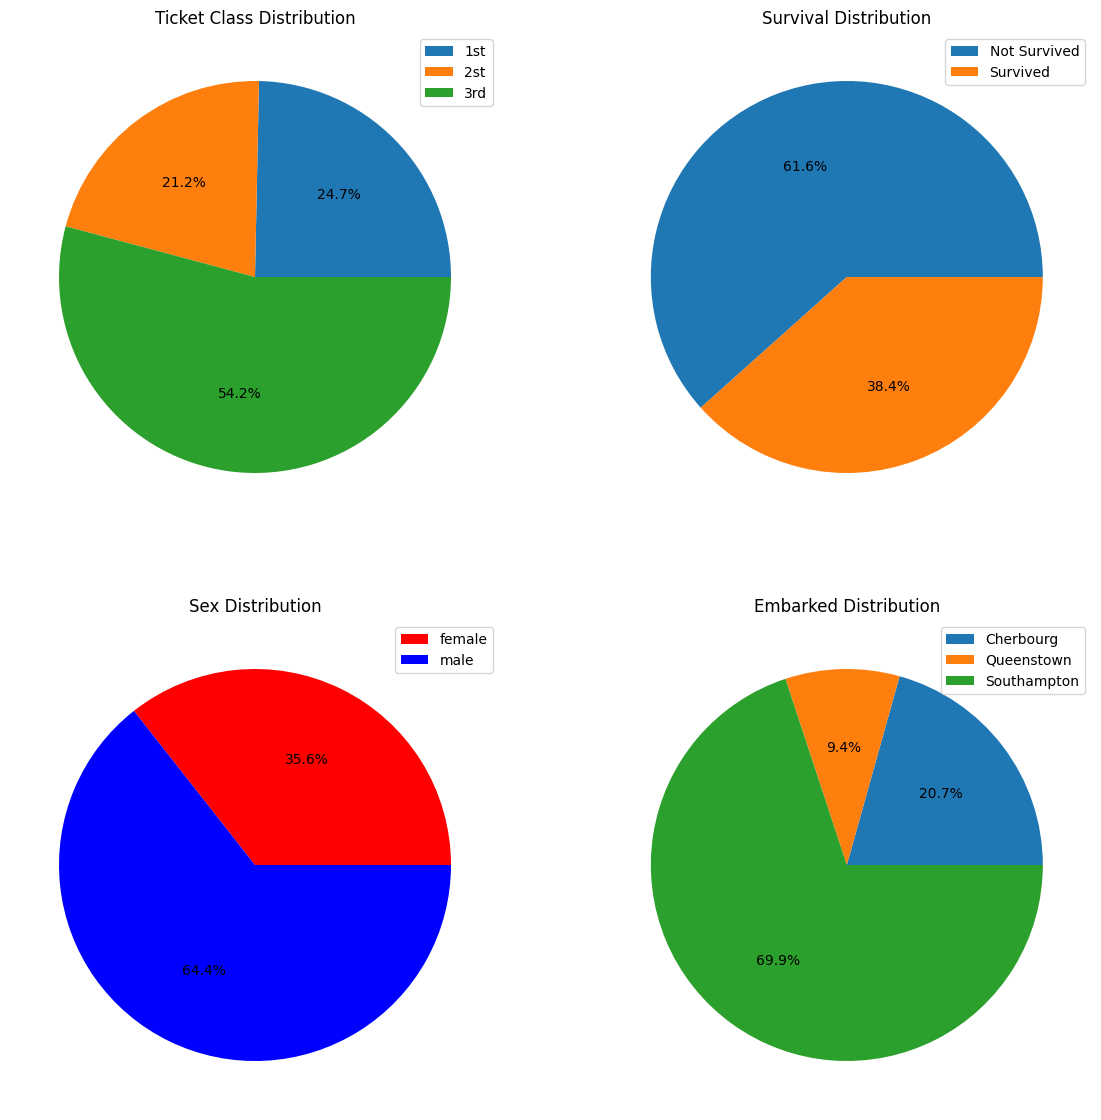

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

data = full.groupby('Pclass')['Pclass'].count()
axes[0,0].pie(data, autopct='%1.1f%%')
axes[0,0].set_title('Ticket Class Distribution')
axes[0,0].legend(data.index.map({1:'1st',2:'2st',3:'3rd'}))

data = full.groupby('Survived')['Survived'].count()
axes[0,1].pie(data, autopct='%1.1f%%')
axes[0,1].set_title('Survival Distribution')
axes[0,1].legend(data.index.map({1:'Survived',0:'Not Survived'}))

data = full.groupby('Sex')['Sex'].count()
axes[1,0].pie(data, autopct='%1.1f%%', colors =['Red','Blue'])
axes[1,0].set_title('Sex Distribution')
axes[1,0].legend(data.index)

data = full.groupby('Embarked')['Embarked'].count()
axes[1,1].pie(data, autopct='%1.1f%%')
axes[1,1].set_title('Embarked Distribution')
axes[1,1].legend(data.index.map({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'}))


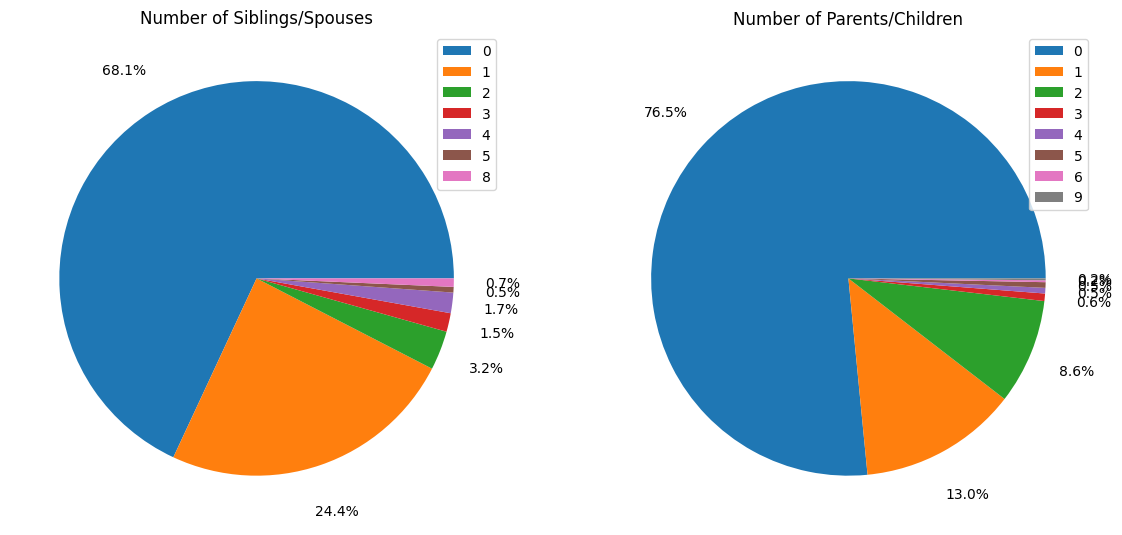

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 14))

data = full.groupby('SibSp')['SibSp'].count()
axes[0].pie(data, autopct='%1.1f%%', pctdistance=1.25)
axes[0].set_title('Number of Siblings/Spouses')
axes[0].legend(data.index)

data = full.groupby('Parch')['Parch'].count()
axes[1].pie(data, autopct='%1.1f%%', pctdistance=1.25)
axes[1].set_title('Number of Parents/Children')
axes[1].legend(data.index, loc='upper right')


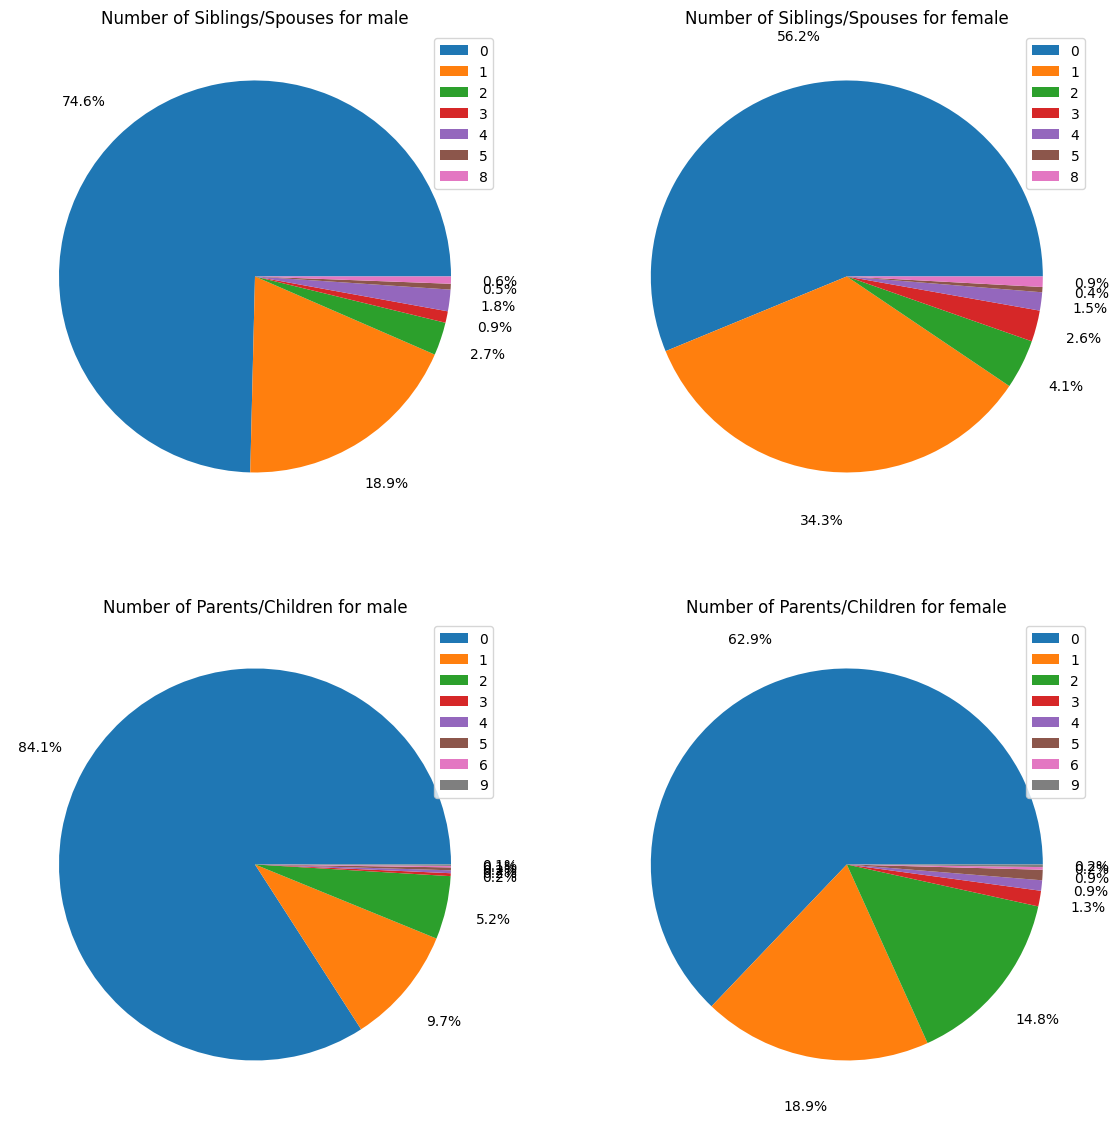

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

data = full[full.Sex == 'male'].groupby('SibSp')['SibSp'].count()
axes[0,0].pie(data, autopct='%1.1f%%', pctdistance=1.25)
axes[0,0].set_title('Number of Siblings/Spouses for male')
axes[0,0].legend(data.index)

data = full[full.Sex == 'female'].groupby('SibSp')['SibSp'].count()
axes[0,1].pie(data, autopct='%1.1f%%', pctdistance=1.25)
axes[0,1].set_title('Number of Siblings/Spouses for female')
axes[0,1].legend(data.index)

data = full[full.Sex == 'male'].groupby('Parch')['Parch'].count()
axes[1,0].pie(data, autopct='%1.1f%%', pctdistance=1.25)
axes[1,0].set_title('Number of Parents/Children for male')
axes[1,0].legend(data.index)

data = full[full.Sex == 'female'].groupby('Parch')['Parch'].count()
axes[1,1].pie(data, autopct='%1.1f%%', pctdistance=1.25)
axes[1,1].set_title('Number of Parents/Children for female')
axes[1,1].legend(data.index)

ValueError: cannot reindex on an axis with duplicate labels

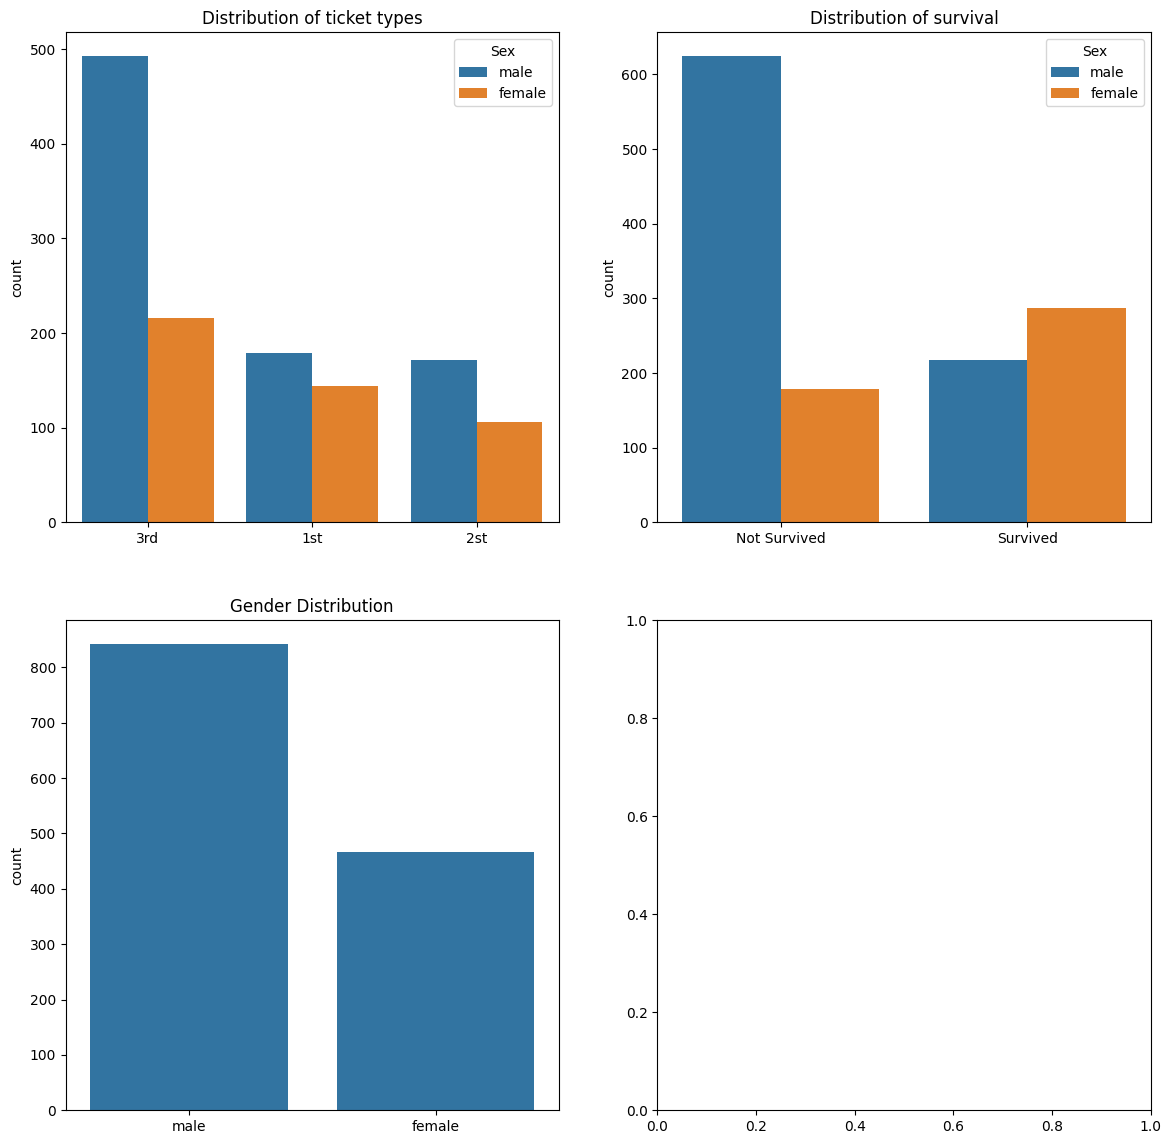

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

sns.countplot(ax = axes[0, 0] ,x=full.Pclass.map({1:'1st',2:'2st',3:'3rd'}), hue = full.Sex)\
.set(title = 'Distribution of ticket types', xlabel = '')

sns.countplot(ax = axes[0, 1], x=full.Survived.map({1:'Survived',0:'Not Survived'}),hue = full.Sex)\
.set(xlabel = '', title = 'Distribution of survival')

sns.countplot(ax = axes[1, 0], x=full.Sex)\
.set(title='Gender Distribution', xlabel = '')

sns.countplot(ax = axes[1, 1], x=full.Embarked\
.map({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'}), hue = full.Sex)\
.set(title='Port of Embarkation Distribution')

ValueError: cannot reindex on an axis with duplicate labels

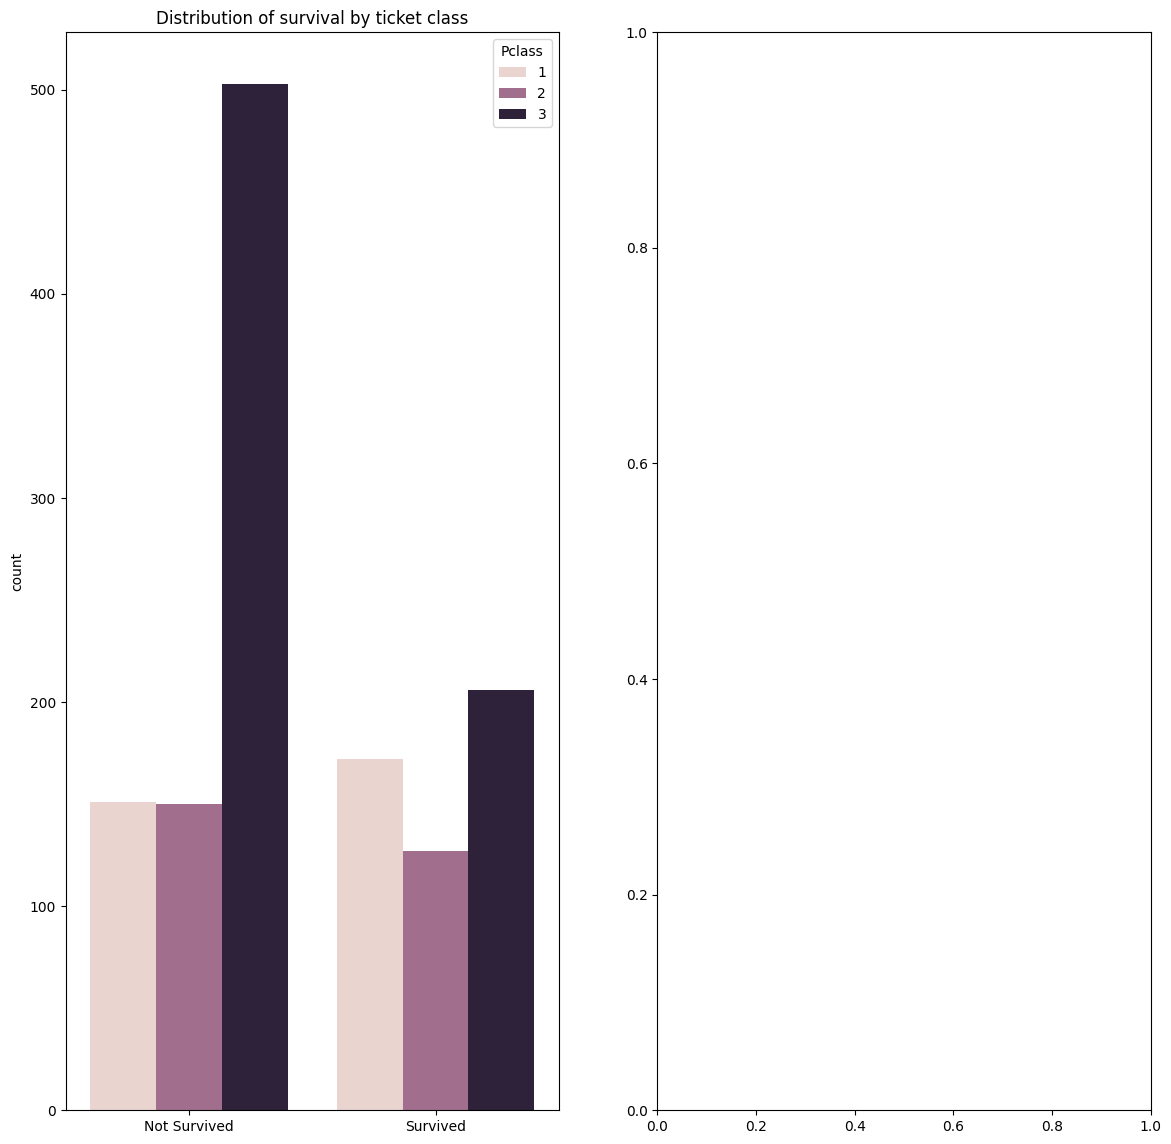

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 14))

sns.countplot(ax = axes[0], x=full.Survived.map({1:'Survived',0:'Not Survived'}),hue = full.Pclass)\
.set(xlabel = '', title = 'Distribution of survival by ticket class')

sns.countplot(ax = axes[1], x=full.Embarked\
.map({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'}), hue = full.Pclass)\
.set(title='Port of Embarkation Distribution by ticket class')